## Feature Scaling
### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude(larger value) range dominate over those with smaller magnitude(value range).
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

## Standardisation

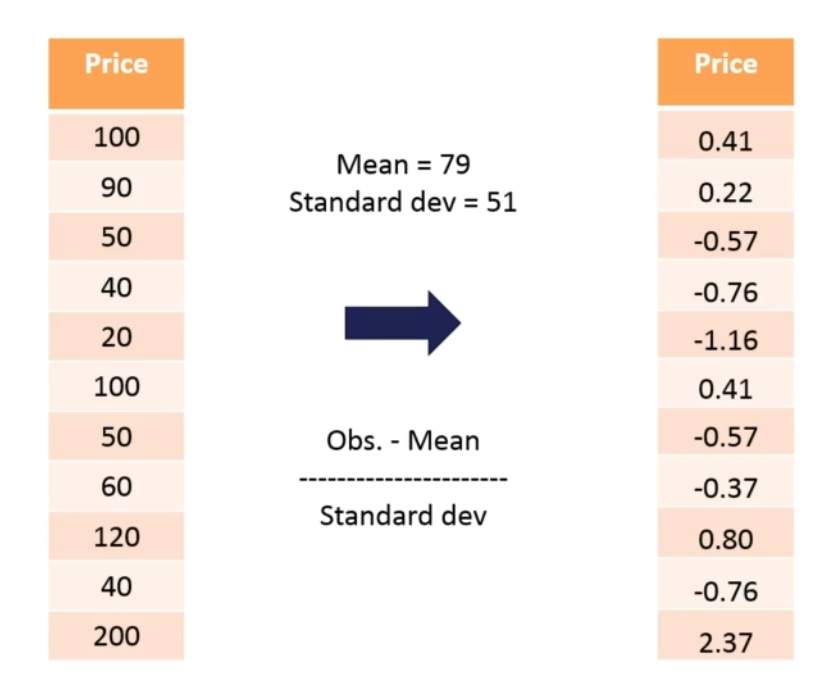

In [1]:
from IPython.display import Image
Image(filename="Images/f1.png")

Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, 

It represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, **standardising a variable does not normalize the distribution of the data** and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

In [4]:
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# print the dataset description
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),data['MEDV'],
                                                    test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [9]:
# The StandardScaler from scikit-learn removes the mean and scales the data to unit variance. 
# Plus, it learns and stores the parameters needed for scaling. 
# Thus, it is top choice for this feature scaling technique.
# On the downside, you can't select which variables to scale directly, it will scale the entire data set, 
# and it returns a NumPy array, without the variable values.

#set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [11]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
       1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
       8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
       7.06848020e+00])

In [12]:
# let's transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [15]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.5,-3.9,-2.4,-1.3,-1.0,-1.3,-2.6,-4.2,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.7,-0.5,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.4,-0.3,-0.5,-0.5,0.3,0.4,-0.2
75%,-0.0,0.3,1.0,-0.3,0.6,0.5,0.9,0.6,1.7,1.6,0.8,0.4,0.6
max,10.3,3.7,2.4,3.8,2.7,3.5,1.1,4.1,1.7,1.8,1.6,0.4,3.5


As expected, the mean of each variable, which were not centered at zero, is now around zero and the standard deviation is set to 1. Note however, that the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers.

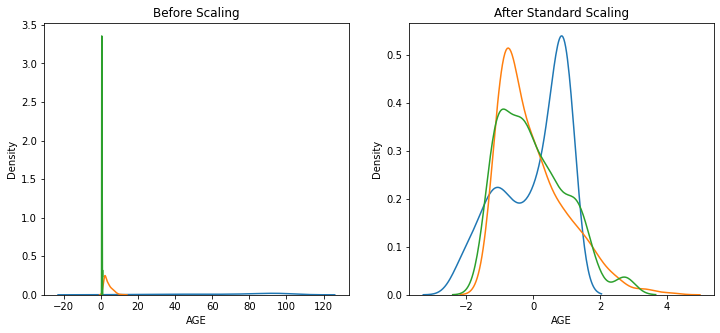

In [16]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Mean Normalisation


Mean normalisation involves centering the variable at zero, and re-scaling to the value range. The procedure involves subtracting the mean of each observation and then dividing by difference between the minimum and maximum value:

**x_scaled = (x - x_mean) / ( x_max - x_min)**


The result of the above transformation is a distribution that is centered at 0, and its minimum and maximum values are within the range of -1 to 1. The shape of a mean normalised distribution will be very similar to the original distribution of the variable, but the variance may change, so not identical.

Again, this technique will not **normalize the distribution of the data** thus if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In a nutshell, mean normalisation:

- centers the mean at 0
- variance will be different
- may alter the shape of the original distribution
- the minimum and maximum values squeezed between -1 and 1
- preserves outliers

Good for algorithms that require features centered at zero.

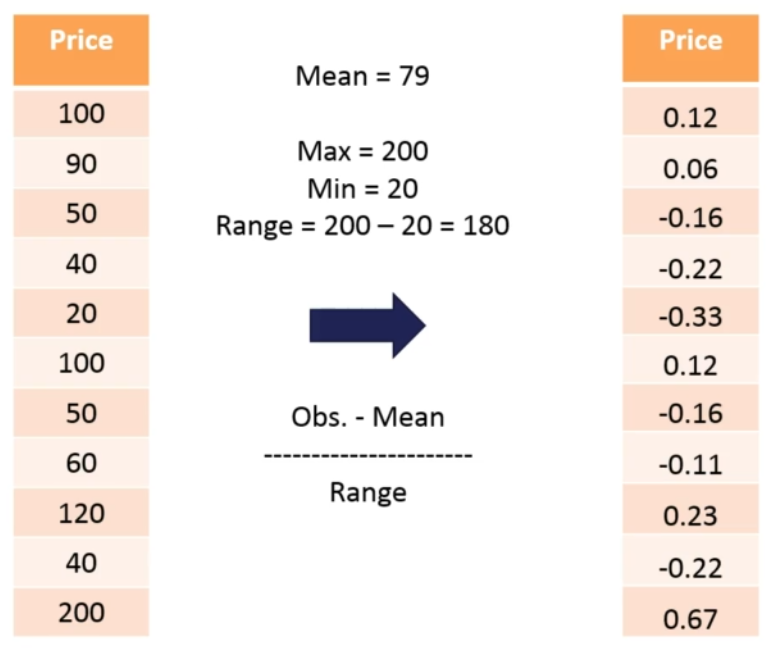

In [17]:
Image(filename="Images/f2.png")

In [20]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalises by max()-min(), important for this to set up the
# quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

In [23]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


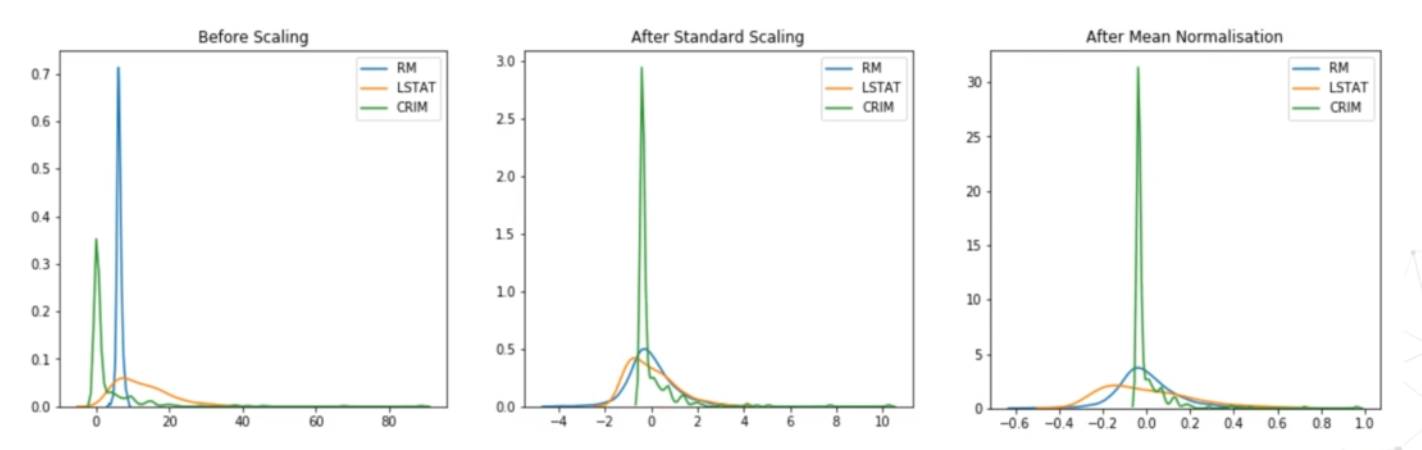

In [25]:
Image(filename="Images/f3.png")

 Variance will not change as we can see in above Image

## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

**X_scaled = (X - X.min / (X.max - X.min)**


The result of the above transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shape of a min-max scaled distribution will be similar to the original variable, but the variance may change, so not identical. This scaling technique is also sensitive to outliers.

In a nutshell, MinMaxScaling:

- does not center the mean at 0
- variance varies across variables
- may not preserve the shape of the original distribution
- the minimum and maximum values are 0 and 1.
- sensitive outliers


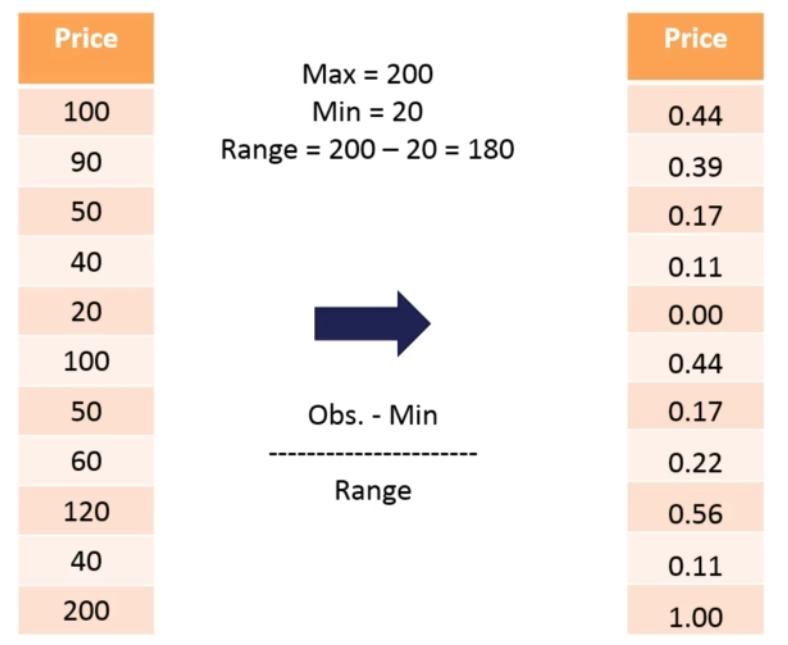

In [26]:
Image(filename="Images/f4.png")

In [28]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [31]:
# the scaler stores the minimum values of the features, learned from train set
scaler.min_

array([-7.10352762e-05,  0.00000000e+00, -1.68621701e-02,  0.00000000e+00,
       -7.92181070e-01, -6.82314620e-01, -2.98661174e-02, -1.07210358e-01,
       -4.34782609e-02, -3.56870229e-01, -1.34042553e+00, -8.06898986e-04,
       -4.90780142e-02])

In [32]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [34]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.1,0.2,0.5,0.9,0.1
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.8,0.2,0.2,0.2,0.7,1.0,0.3
75%,0.0,0.2,0.6,0.0,0.5,0.6,0.9,0.4,1.0,0.9,0.8,1.0,0.4
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


As expected, the minimum and maximum values for all the variables are 0 and 1, respectively. The mean is not centered at zero, and the variance changes.

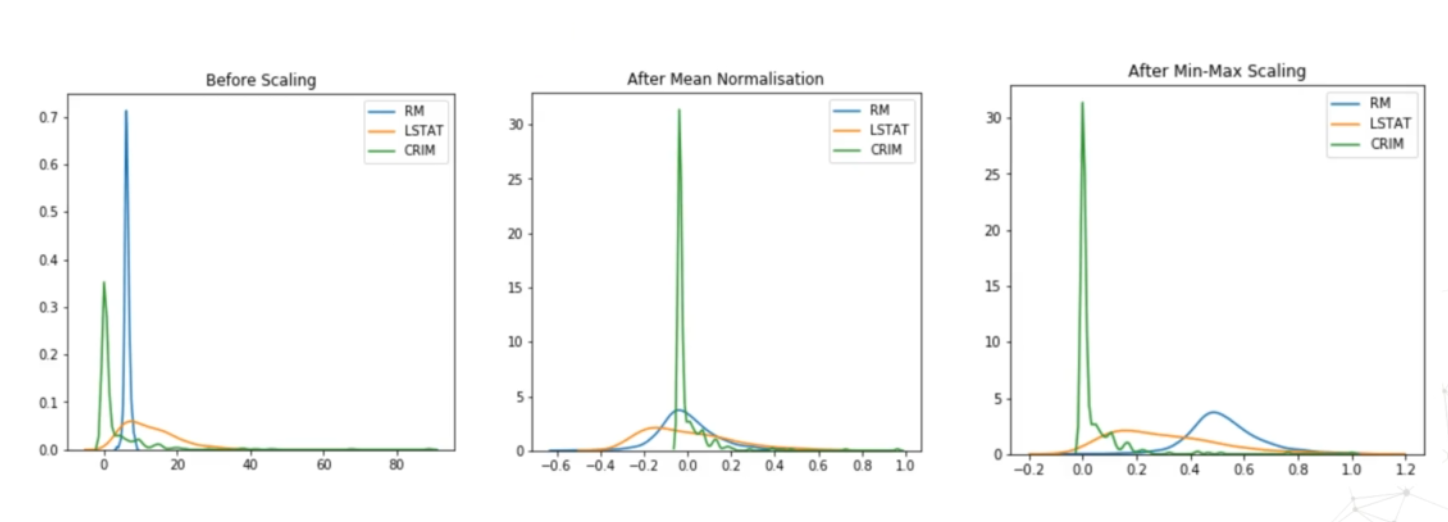

In [35]:
Image(filename="Images/f5.png")

## Scaling to maximum value - MaxAbsScaling

Maximum absolute scaling scales the data to its maximum value:

**X_scaled = X / X.max**

The result of the above transformation is a distribution which values vary within the range of -1 to 1. But the mean is not centered at zero and the standard deviation varies across variables.

Scikit-learn suggests that this transformer is meant for data that is centered at zero, and for sparse data.


In a nutshell, MaxAbsScaling:

- does not center the mean at 0 (but it might be a good idea t center it with another method)
- variance varies across variables
- may not preserve the shape of the original distribution
- sensitive outliers

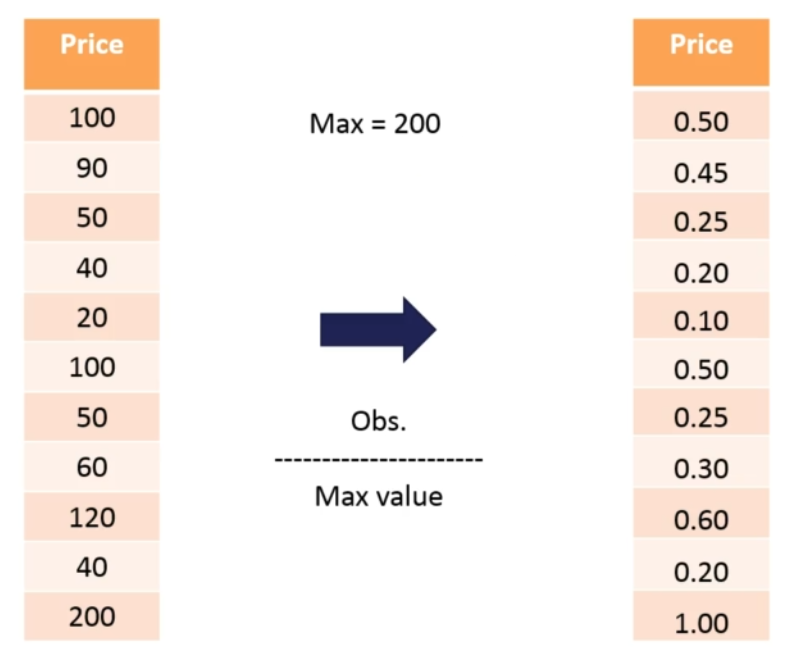

In [42]:
Image(filename="Images/f6.png")

In [37]:
# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# the scaler stores the maximum values of the features as learned from train set
scaler.max_abs_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [41]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.6,0.7,0.7,0.3,0.4,0.6,0.8,0.9,0.3
std,0.1,0.2,0.3,0.2,0.1,0.1,0.3,0.2,0.4,0.2,0.1,0.2,0.2
min,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.1,0.0,0.3,0.6,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.5,0.7,0.5,0.2,0.2,0.4,0.8,0.9,0.2
50%,0.0,0.0,0.3,0.0,0.6,0.7,0.8,0.3,0.2,0.4,0.9,1.0,0.3
75%,0.0,0.2,0.7,0.0,0.7,0.8,0.9,0.4,1.0,0.9,0.9,1.0,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The maximum values are re-scaled to 1. Every other parameter, changes across variables.

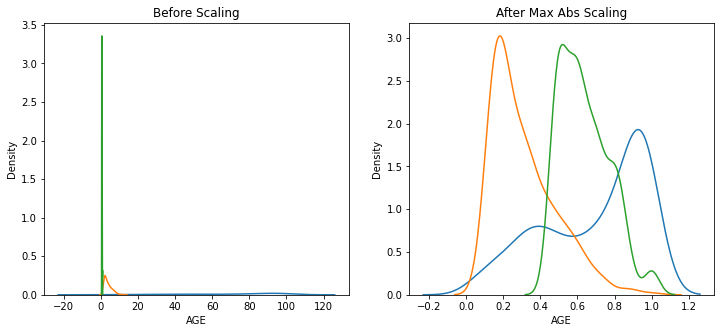

In [43]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Scaling to quantiles and median - RobustScaling

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

This robust scaling method produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers.

In a nutshell, RobustScaling:

- centers the median at 0
- variance varies across variables
- may not preserve the shape of the original distribution
- the minimum and maximum values vary.
- robust outliers

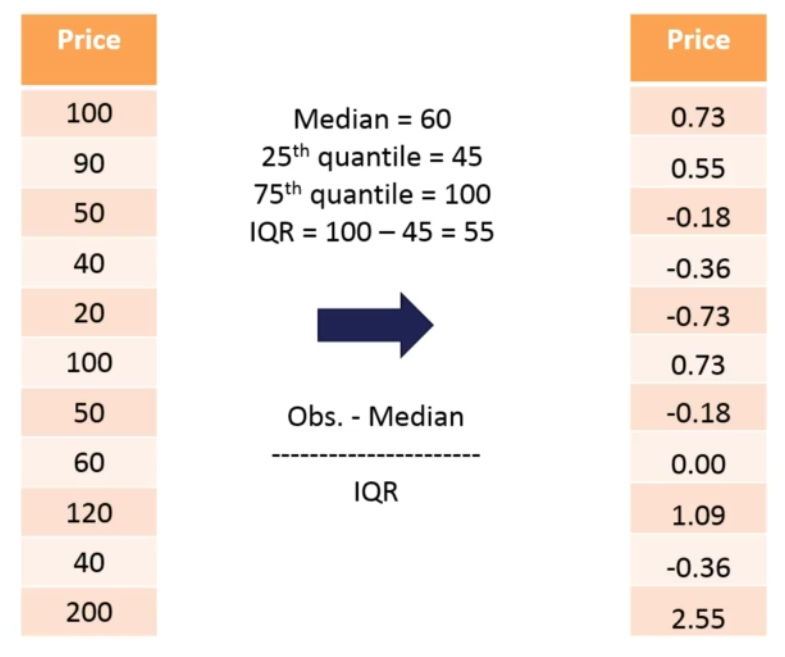

In [44]:
Image(filename="Images/f7.png")

In [46]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# the scaler stores the median values of the features as learned from train set
scaler.center_

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21550e+00, 7.94500e+01, 3.21570e+00, 5.00000e+00, 3.11000e+02,
       1.91000e+01, 3.91605e+02, 1.11600e+01])

In [48]:
# the scaler stores the IQR values of the features as learned from train set

scaler.scale_

array([3.030275e+00, 2.000000e+01, 1.315000e+01, 1.000000e+00,
       1.792500e-01, 7.520000e-01, 4.857500e+01, 2.971650e+00,
       2.000000e+01, 3.900000e+02, 2.800000e+00, 1.963250e+01,
       9.982500e+00])

In [50]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [51]:
# let's have a look at the original training dataset: median values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.median(), 1)

CRIM         0.3
ZN           0.0
INDUS        8.6
CHAS         0.0
NOX          0.5
RM           6.2
AGE         79.4
DIS          3.2
RAD          5.0
TAX        311.0
PTRATIO     19.1
B          391.6
LSTAT       11.2
dtype: float64

In [52]:
# let's have a look at the scaled training dataset: median values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.median(), 1)

CRIM      -0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM        -0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B         -0.0
LSTAT      0.0
dtype: float64

The variables were centered to the median values.

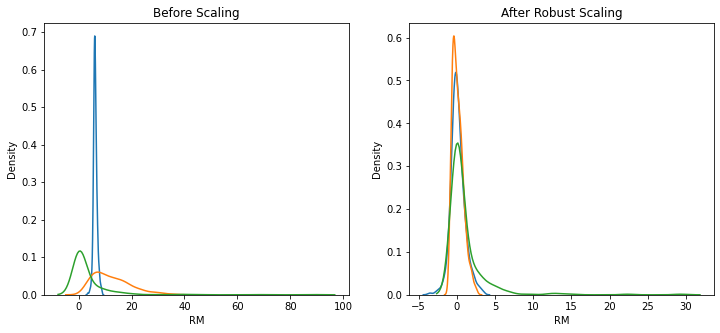

In [53]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

The median of the distributions are centered at zero, but every other parameter may vary in the different variables. It does, though, squeeze the value range in the original variables, particularly for those highly skewed, like CRIM.

## Scaling to vector unit  length / unit norm

In this procedure we scale the components of a feature vector such that the complete vector has a length of 1 or, in other words a norm of 1. **Note** that this normalisation procedure normalises the **feature** vector, and not the **observation** vector. So we divide by the norm of the feature vector, observation per observation, across the different variables, and not by the norm of the **observation** vector, across observations for the same feature.

First, let me give you the formulas, and then I illustrate with an example.

### Scaling to unit norm, formulas

Scaling to unit norm is achieved by dividing each feature vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm):

X_scaled_l1 = X / l1(X)

X_scaled_l2 X / l2(X)


The **Manhattan distance** is given by the sum of the absolute components of the vector:

l1(X) = |x1| + |x2| + ... + |xn|


Whereas the **Euclidean distance** is given by the square root of the square sum of the component of the vector:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


In the above example, x1 is variable 1, x2 variable 2, and xn variable n, and X is the data for 1 observation across variables (a row in other words).

**Note** as well that as the euclidean distance squares the values of the feature vector components, outliers have a heavier weight. With outliers, we may prefer to use l1 normalisation.


### Scaling to unit norm, examples

For example, if our data has 1 observations (1 row) and 3 variables:

- number of pets
- number of children
- age

The values for each variable for that single observation are 10, 15 and 20. Our vector X = [10, 15, 20]. Then:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

The euclidean distance is always smaller than the manhattan distance.


The normalised vector values are therefore:

X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn recommends this scaling procedures for text classification or clustering. For example, they quote the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

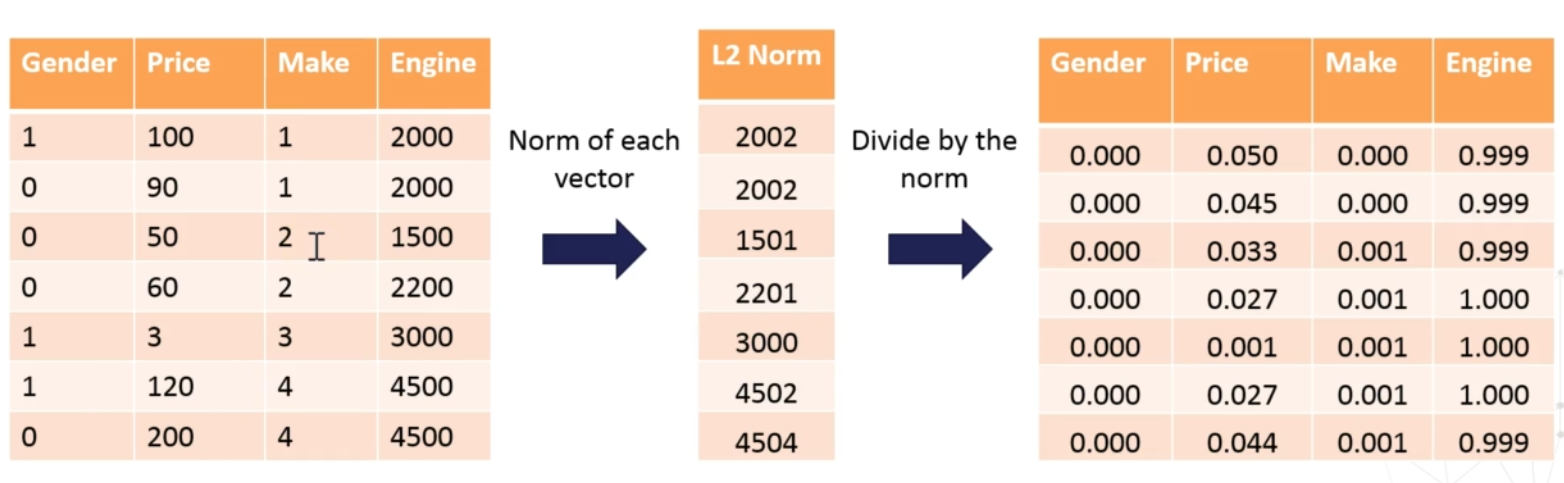

In [54]:
Image(filename="Images/f8.png")

In [63]:
# set up the scaler
scaler = Normalizer(norm='l1') # pass Norm = l2 For L2 

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# let's calculate the norm for each observation (feature vector)
# original data

np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)

array([1024.1,  744. , 1003.5,  858. ,  732.4,  859.3,  845.9,  847. ,
        888.1,  826.7,  705.9,  808.9,  734. ,  784.6,  785.1,  819.6,
       1212.9, 1258. ,  757.6, 1223. , 1236.1,  890.2, 1166.8, 1270. ,
        919. ,  925.9, 1197. ,  770.3, 1118. ,  886.7,  719. ,  952. ,
        933.4,  745. ,  805.6,  825.1,  678.5,  947.7,  910. ,  816. ,
        769.1,  832.4,  763.5,  777. ,  850.4, 1137.7,  802.1,  703.4,
        802.6,  688. ,  801.8,  877.3,  753.8,  912.4,  936.7,  813.6,
       1194. ,  771.9,  739.5,  825.9,  890.8,  891.6,  844.4,  927.1,
        998.6,  903.3, 1250.3,  739.5, 1095.3,  857.7,  834.8,  738.4,
        855.1, 1238.4,  828.6,  958.4,  775. ,  923.4,  859.6,  830.7,
        782.3,  796.8,  953.2,  857.9, 1249.9,  716.7,  803.9,  978.8,
       1186.9,  904. , 1238.2,  981.6,  884.9,  924.9,  694.1,  725.2,
        832.4,  717.7,  917. , 1263.9,  836.7,  813.5,  992.5,  823.4,
       1224.3,  712.1,  841.2,  950.3,  702.6,  791.9,  830.4,  742.1,
      

In [58]:
# let's calculate the norm for each observation (feature vector)
# scaled data

np.round( np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Now, each feature vector has a l1 norm of 1.

In [59]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [60]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [61]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.003022,0.014491,0.011731,0.000073,0.000620,0.007221,0.075687,0.004479,0.009336,0.427642,0.020880,0.411273,0.013544
std,0.007018,0.028764,0.006854,0.000283,0.000115,0.001620,0.029466,0.002780,0.007262,0.114922,0.003751,0.124328,0.007204
min,0.000008,0.000000,0.000577,0.000000,0.000424,0.002996,0.004348,0.000919,0.001163,0.250885,0.014363,0.000374,0.001879
25%,0.000093,0.000000,0.006243,0.000000,0.000545,0.006061,0.055411,0.002206,0.004740,0.346035,0.016876,0.318534,0.008473
50%,0.000311,0.000000,0.010421,0.000000,0.000611,0.007376,0.078917,0.003923,0.006021,0.393483,0.021129,0.456271,0.012262
75%,0.002983,0.024709,0.015120,0.000000,0.000657,0.008358,0.098186,0.006456,0.018223,0.526258,0.024014,0.498519,0.017204
max,0.066782,0.121905,0.035787,0.001422,0.001337,0.011541,0.144310,0.016269,0.028684,0.795970,0.030523,0.578661,0.041723


The values have been squeezed in a smaller value range.